In [148]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [149]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [150]:

columnsName = df.columns.tolist()

for index, name in enumerate(columnsName):
    print(f"Column {index}: {name}")


Column 0: CustomerID
Column 1: Count
Column 2: Country
Column 3: State
Column 4: City
Column 5: Zip Code
Column 6: Lat Long
Column 7: Latitude
Column 8: Longitude
Column 9: Gender
Column 10: Senior Citizen
Column 11: Partner
Column 12: Dependents
Column 13: Tenure Months
Column 14: Phone Service
Column 15: Multiple Lines
Column 16: Internet Service
Column 17: Online Security
Column 18: Online Backup
Column 19: Device Protection
Column 20: Tech Support
Column 21: Streaming TV
Column 22: Streaming Movies
Column 23: Contract
Column 24: Paperless Billing
Column 25: Payment Method
Column 26: Monthly Charges
Column 27: Total Charges
Column 28: Churn Label
Column 29: Churn Value
Column 30: Churn Score
Column 31: CLTV
Column 32: Churn Reason


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [152]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

CustomerID : ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country : ['United States']
State : ['California']
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Lat Long : ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year'

In [153]:
df.drop(columns=['CustomerID'], inplace=True)
#df.drop(columns=['Lat Long'], inplace=True)
df.drop(columns=['Churn Reason'], inplace=True)

In [154]:
df.head(1)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239


In [155]:
print(df.isnull().sum())


Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


In [156]:
#columnsName=df.drop(labels='Churn Label',axis=1).columns.values.tolist()
#columnsName

In [157]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [158]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [159]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn Label'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(  
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn Label', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [160]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [161]:
labels = df['Payment Method'].value_counts().index.tolist()
values = df['Payment Method'].value_counts().values.tolist()

# Define a color palette that is more comfortable for the eyes
colors = px.colors.qualitative.Pastel1

# Create a pie chart with the new color palette
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])

# Update layout with a title
fig.update_layout(title_text="<b>Payment Method Distribution</b>")

# Show the plot
fig.show()

In [162]:
df['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

<Axes: xlabel='Internet Service', ylabel='count'>

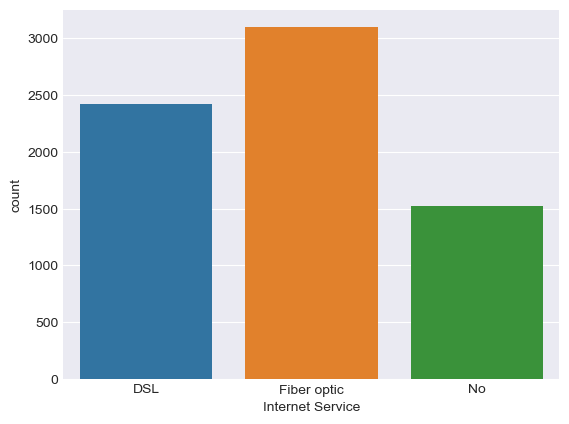

In [163]:
sns.countplot(x=df["Internet Service"])


In [164]:
labels = df['Internet Service'].value_counts().index.tolist()
values = df['Internet Service'].value_counts().values.tolist()

# Define a color palette that is more comfortable for the eyes
colors = px.colors.qualitative.Bold

# Create a pie chart with the new color palette
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])

# Update layout with a title
fig.update_layout(title_text="<b>Payment Method Distribution</b>")

# Show the plot
fig.show()

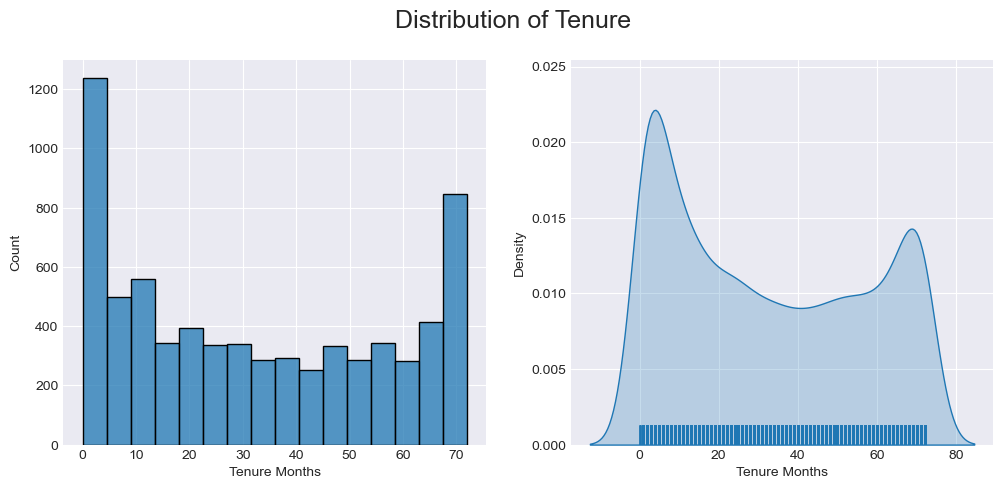

In [165]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["Tenure Months"],ax=ax[0])
sns.kdeplot(df["Tenure Months"],fill=True,ax=ax[1])
sns.rugplot(df["Tenure Months"],height=0.05)

fig.suptitle("Distribution of Tenure",size=18);

<Axes: xlabel='Churn Label', ylabel='count'>

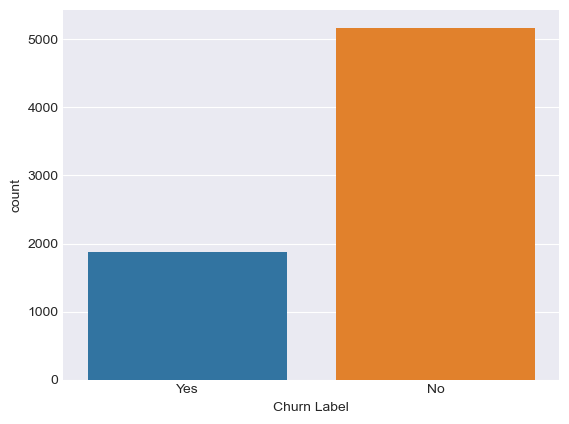

In [181]:
sns.countplot(x=df["Churn Label"])
